# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint

from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units ="metric"
response = requests.get(f"{base_url}appid={weather_api_key}&units={units}&q=" + city).json()
pprint (response)

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 39.1834, 'lon': -84.5333},
 'dt': 1673992723,
 'id': 4513583,
 'main': {'feels_like': 13.37,
          'humidity': 58,
          'pressure': 1003,
          'temp': 14.36,
          'temp_max': 14.91,
          'temp_min': 13.33},
 'name': 'Hamilton',
 'sys': {'country': 'US',
         'id': 2003707,
         'sunrise': 1673960108,
         'sunset': 1673995247,
         'type': 2},
 'timezone': -18000,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 270, 'gust': 3.13, 'speed': 2.24}}


In [4]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units ="metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    response = requests.get(f"{base_url}appid={weather_api_key}&units={units}&q=" + city).json()

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response["wind"]['speed']
        city_country = response['sys']['country']
        city_date = response["dt"]

# #         # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

        # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
       
# # Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | severo-kurilsk
Processing Record 2 of Set 1 | nikolskoye
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | trairi
Processing Record 5 of Set 1 | nyagan
Processing Record 6 of Set 1 | caala
Processing Record 7 of Set 1 | thiers
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | broken hill
Processing Record 10 of Set 1 | tura
Processing Record 11 of Set 1 | longyearbyen
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | saleaula
City not found. Skipping...
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | tuatapere
Processing Record 17 of Set 1 | colares
Processing Record 18 of Set 1 | tautira
Processing Record 19 of Set 1 | te anau
Processing Record 20 of Set 1 | mahebourg
Processing Record 21 of Set 1 | kaeo
Processing Record 22 of Set 1 | souillac
Processing Record

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,severo-kurilsk,50.6789,156.1250,-9.21,77,100,9.72,RU,1673992960
1,nikolskoye,59.7035,30.7861,0.94,97,100,4.63,RU,1673992961
2,rikitea,-23.1203,-134.9692,25.84,70,100,2.19,PF,1673992962
3,trairi,-3.2778,-39.2689,25.81,78,10,4.82,BR,1673992792
4,nyagan,62.1406,65.3936,-12.73,86,52,3.25,RU,1673992963


In [7]:
# Export the City_Data into a csv
# output_path = os.path.join("..", "output_data", "new.csv")
# print(output_path)
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,severo-kurilsk,50.6789,156.1250,-9.21,77,100,9.72,RU,1673992960
1,nikolskoye,59.7035,30.7861,0.94,97,100,4.63,RU,1673992961
2,rikitea,-23.1203,-134.9692,25.84,70,100,2.19,PF,1673992962
3,trairi,-3.2778,-39.2689,25.81,78,10,4.82,BR,1673992792
4,nyagan,62.1406,65.3936,-12.73,86,52,3.25,RU,1673992963


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [11]:
#R-value:
lat = city_data_df["Lat"]
max_temp = city_data_df["Max Temp"]
round(st.pearsonr(lat, max_temp)[0],2)
print(f"The r-value is {round(st.pearsonr(lat, max_temp)[0],2)}")
# The line Graph:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(lat, max_temp)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r-value is -0.78


The r-value is -0.7753828254


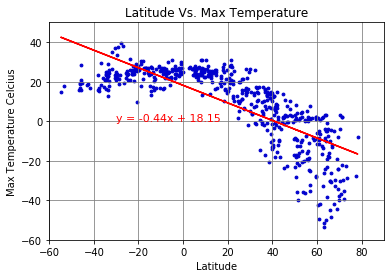

In [24]:

lat = city_data_df["Lat"]
max_temp = city_data_df["Max Temp"]

#R-value:
round(st.pearsonr(lat, max_temp)[0],2)
print(f"The r-value is {round(st.pearsonr(lat, max_temp)[0],10)}")
# Line for graph
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(lat, max_temp)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Build scatter plot for latitude vs. temperature
plt.scatter(lat,max_temp,marker="o", s=8, color="mediumblue")
plt.title("Latitude Vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature Celcius")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")
plt.plot(lat,regress_values,"r-")
plt.annotate(line_eq,(-30,0),fontsize=11,color="red")
y_lim_ht = (city_data_df["Max Temp"].max()+10).round(-1)
y_lim_lt = (city_data_df["Max Temp"].min()-10).round(-1)
plt.ylim(y_lim_lt,y_lim_ht)
plt.xlim(-60,90)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

The r-value is 0.261724694


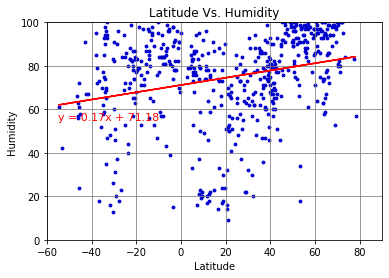

In [28]:
# Build the scatter plots for latitude vs. humidity
hum=city_data_df["Humidity"]

#R-value:
round(st.pearsonr(lat, hum)[0],2)
print(f"The r-value is {round(st.pearsonr(lat, hum)[0],10)}")
# Line for graph
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(lat, hum)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


# Incorporate the other graph properties
plt.scatter(lat,hum,marker="o", s=8, color="mediumblue")
plt.title("Latitude Vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")
plt.plot(lat,regress_values,"r-")
plt.annotate(line_eq,(-55,55),fontsize=11,color="red")
plt.xlim(-60,90)
plt.ylim(0,100)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

The r-value is 0.0662919306


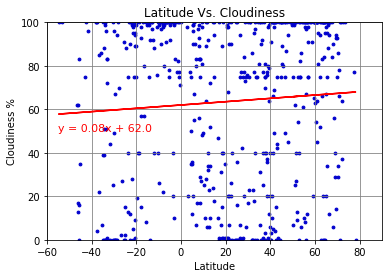

In [32]:
# Build the scatter plots for latitude vs. cloudiness
cloud=city_data_df["Cloudiness"]

#R-value:
round(st.pearsonr(lat, cloud)[0],2)
print(f"The r-value is {round(st.pearsonr(lat, cloud)[0],10)}")
# Line for graph
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(lat, cloud)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


# Incorporate the other graph properties
plt.scatter(lat,cloud,marker="o", s=8, color="mediumblue")
plt.title("Latitude Vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")
plt.plot(lat,regress_values,"r-")
plt.annotate(line_eq,(-55,50),fontsize=11,color="red")
plt.xlim(-60,90)
plt.ylim(0,100)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

The r-value is 0.0346182656


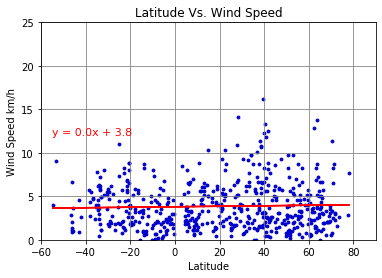

In [38]:
# Build the scatter plots for latitude vs. wind speed
wind=city_data_df["Wind Speed"]

#R-value:
round(st.pearsonr(lat, wind)[0],2)
print(f"The r-value is {round(st.pearsonr(lat, wind)[0],10)}")
# Line for graph
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(lat, wind)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


# Incorporate the other graph properties
plt.scatter(lat,wind,marker="o", s=8, color="mediumblue")
plt.title("Latitude Vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed km/h")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")
plt.plot(lat,regress_values,"r-")
plt.annotate(line_eq,(-55,12),fontsize=11,color="red")
plt.xlim(-60,90)
plt.ylim(0,25)



# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [197]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,northam,51.0333,-4.2167,8.12,89,100,4.06,GB,1672625158
2,jamestown,42.0970,-79.2353,5.57,75,100,3.60,US,1672625178
3,anadyr,64.7500,177.4833,-34.73,98,93,3.82,RU,1672625020
4,pavullo nel frignano,44.3315,10.8350,9.32,86,84,1.51,IT,1672625469
5,karla,59.3723,24.9275,1.66,80,0,4.63,EE,1672625470


In [200]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,micheweni,-4.9667,39.8333,26.34,76,8,3.65,TZ,1672625466
6,auki,-8.7676,160.7034,28.21,81,100,4.51,SB,1672625471
7,puerto ayora,-0.7393,-90.3518,22.53,95,14,1.34,EC,1672625473
8,valparaiso,-33.0393,-71.6273,18.80,45,0,1.03,CL,1672625474
12,new norfolk,-42.7826,147.0587,27.17,44,97,0.89,AU,1672624895


###  Temperature vs. Latitude Linear Regression Plot

The correlation coefficient between temperature and lattitude in the Northern Hemisphere is -0.84


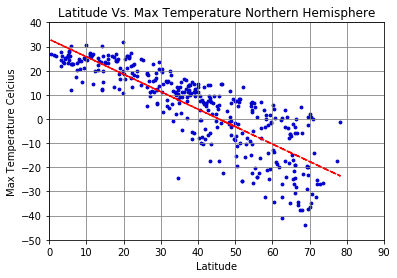

In [250]:
# Linear regression on Northern Hemisphere

nh_mt = northern_hemi_df["Max Temp"]
nh_lat = northern_hemi_df ["Lat"]
print(f"The correlation coefficient between temperature and latitude in the Northern Hemisphere is {round(st.pearsonr(nh_mt,nh_lat)[0],2)}")

pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(nh_lat, nh_mt)
pe_fit = pe_slope * nh_lat + pe_int

# plt.scatter(nh_mt,nh_lat)
plt.plot(nh_lat,pe_fit,"--", color ="red")
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"],marker="o", s=8, color="mediumblue")
plt.title("Latitude Vs. Max Temperature Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature Celcius")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")
y_lim_htnh = (northern_hemi_df["Max Temp"].max()+10).round(-1)
y_lim_ltnh = (northern_hemi_df["Max Temp"].min()-10).round(-1)
plt.ylim(y_lim_ltnh,y_lim_htnh)
plt.xlim(0,90)


# Save the figure
plt.savefig("output_data/Fig5.png")

# Show plot
plt.show()

The correlation coefficient between temperature and lattitude in the Southern Hemisphere is 0.37


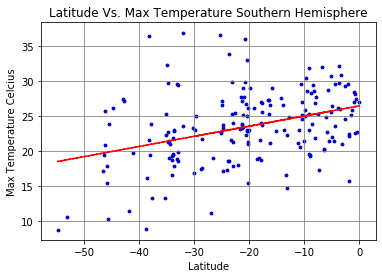

In [246]:
# Linear regression on Southern Hemisphere
sh_mt = southern_hemi_df["Max Temp"]
sh_lat = southern_hemi_df ["Lat"]
print(f"The correlation coefficient between temperature and latitude in the Southern Hemisphere is {round(st.pearsonr(sh_mt,sh_lat)[0],2)}")


pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(sh_lat, sh_mt)
pe_fit = pe_slope * sh_lat + pe_int
plt.plot(sh_lat,pe_fit,"--", color ="red")

plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"],marker="o", s=8, color="mediumblue")
plt.title("Latitude Vs. Max Temperature Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature Celcius")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")
y_lim_htsh = (southern_hemi_df["Max Temp"].max()+10).round(-1)
y_lim_ltsh = (southern_hemi_df["Max Temp"].min()-10).round(-1)
# plt.ylim(y_lim_ltsh,y_lim_htsh)
# plt.xlim(-60,0)


# Save the figure
plt.savefig("output_data/Fig6.png")

# Show plot
plt.show()

**Discussion about the linear relationship:**
There is a much stronger positive correlation between temperature and latitude in the Northern Hemisphere. This could possibly be due to the opposites in season. Further analysis will be needed to determine if the linear relationship changes over the seasons in both hemisheres.

### Humidity vs. Latitude Linear Regression Plot

The correlation coefficient between humidity and lattitude in the Northern Hemisphere is 0.36
0.04731006677096508


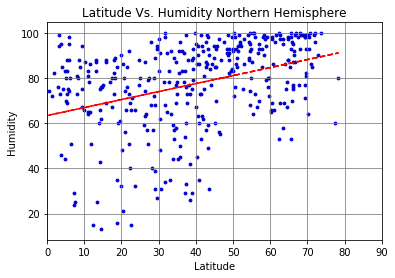

In [255]:
# Northern Hemisphere
nh_hu = northern_hemi_df["Humidity"]
nh_lat = northern_hemi_df ["Lat"]
print(f"The correlation coefficient between humidity and latitude in the Northern Hemisphere is {round(st.pearsonr(nh_hu,nh_lat)[0],2)}")

pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(nh_lat, nh_hu)
pe_fit = pe_slope * nh_lat + pe_int

plt.plot(nh_lat,pe_fit,"--", color ="red")
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Humidity"],marker="o", s=8, color="mediumblue")
plt.title("Latitude Vs. Humidity Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")

plt.xlim(0,90)


# Save the figure
plt.savefig("output_data/Fig7.png")
# Show plot
plt.show()

The correlation coefficient between humidity and lattitude in the Southern Hemisphere is 0.28


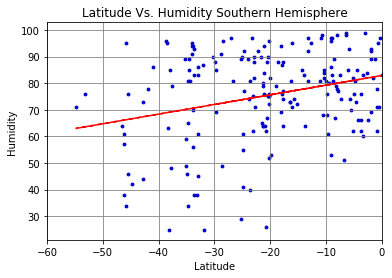

In [263]:
# Southern Hemisphere
sh_hu = southern_hemi_df["Humidity"]
sh_lat = southern_hemi_df ["Lat"]
print(f"The correlation coefficient between humidity and latitude in the Southern Hemisphere is {round(st.pearsonr(sh_hu,sh_lat)[0],2)}")

pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(sh_lat, sh_hu)
pe_fit = pe_slope * sh_lat + pe_int

plt.plot(sh_lat,pe_fit,"--", color ="red")
plt.scatter(sh_lat,sh_hu,marker="o", s=8, color="mediumblue")
plt.title("Latitude Vs. Humidity Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")

plt.xlim(-60,0)

# Save the figure
plt.savefig("output_data/Fig8.png")
# Show plot
plt.show()

**Discussion about the linear relationship:** There is a weak positive correlation between latitude and humidity in both Hemispheres

### Cloudiness vs. Latitude Linear Regression Plot

The correlation coefficient between cloudiness and lattitude in the Northern Hemisphere is 0.27


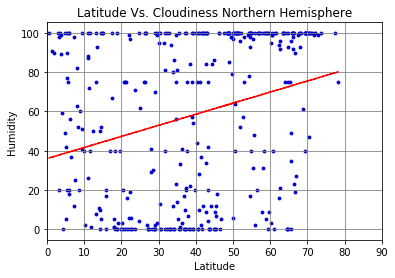

In [267]:
# Northern Hemisphere
nh_cl = northern_hemi_df["Cloudiness"]
nh_lat = northern_hemi_df ["Lat"]
print(f"The correlation coefficient between cloudiness and latitude in the Northern Hemisphere is {round(st.pearsonr(nh_cl,nh_lat)[0],2)}")

pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(nh_lat, nh_cl)
pe_fit = pe_slope * nh_lat + pe_int

plt.plot(nh_lat,pe_fit,"--", color ="red")
plt.scatter(nh_lat,nh_cl,marker="o", s=8, color="mediumblue")
plt.title("Latitude Vs. Cloudiness Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")

plt.xlim(0,90)


# Save the figure
plt.savefig("output_data/Fig9.png")
# Show plot
plt.show()

The correlation coefficient between cloudiness and lattitude in the Southern Hemisphere is 0.35


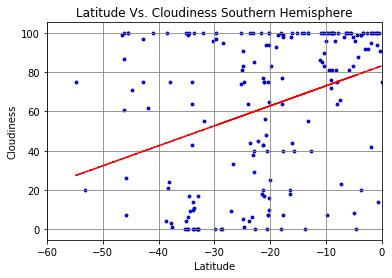

In [272]:
# Southern Hemisphere
sh_cl = southern_hemi_df["Cloudiness"]
sh_lat = southern_hemi_df ["Lat"]
print(f"The correlation coefficient between cloudiness and latitude in the Southern Hemisphere is {round(st.pearsonr(sh_cl,sh_lat)[0],2)}")

pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(sh_lat, sh_cl)
pe_fit = pe_slope * sh_lat + pe_int

plt.plot(sh_lat,pe_fit,"--", color ="red")
plt.scatter(sh_lat,sh_cl,marker="o", s=8, color="mediumblue")
plt.title("Latitude Vs. Cloudiness Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")

plt.xlim(-60,0)

# Save the figure
plt.savefig("output_data/Fig10.png")
# Show plot
plt.show()

**Discussion about the linear relationship:** There is a weak positive correlation between latitude and cloudiness, 
with a slightly higher correlation in the Southern Hemisphere

### Wind Speed vs. Latitude Linear Regression Plot

The correlation coefficient between Wind Speed and lattitude in the Northern Hemisphere is 0.13


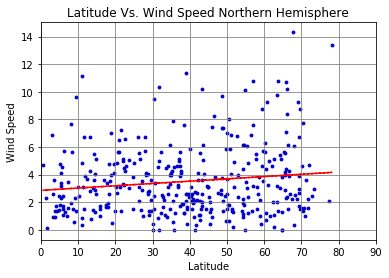

In [269]:
# Northern Hemisphere
nh_ws = northern_hemi_df["Wind Speed"]
nh_lat = northern_hemi_df ["Lat"]
print(f"The correlation coefficient between Wind Speed and latitude in the Northern Hemisphere is {round(st.pearsonr(nh_ws,nh_lat)[0],2)}")

pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(nh_lat, nh_ws)
pe_fit = pe_slope * nh_lat + pe_int

plt.plot(nh_lat,pe_fit,"--", color ="red")
plt.scatter(nh_lat,nh_ws,marker="o", s=8, color="mediumblue")
plt.title("Latitude Vs. Wind Speed Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")

plt.xlim(0,90)


# Save the figure
plt.savefig("output_data/Fig11.png")
# Show plot
plt.show()

The correlation coefficient between Wind Speed and lattitude in the Southern Hemisphere is -0.29


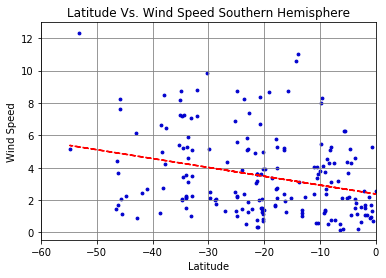

In [271]:
# Southern Hemisphere
sh_ws = southern_hemi_df["Wind Speed"]
sh_lat = southern_hemi_df ["Lat"]
print(f"The correlation coefficient between Wind Speed and latitude ude in the Southern Hemisphere is {round(st.pearsonr(sh_ws,sh_lat)[0],2)}")

pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(sh_lat, sh_ws)
pe_fit = pe_slope * sh_lat + pe_int

plt.plot(sh_lat,pe_fit,"--", color ="red")
plt.scatter(sh_lat,sh_ws,marker="o", s=8, color="mediumblue")
plt.title("Latitude Vs. Wind Speed Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")

plt.xlim(-60,0)

# Save the figure
plt.savefig("output_data/Fig12.png")
# Show plot
plt.show()

**Discussion about the linear relationship:** There is a weak correlation between latitude and humidity, 
slightly positive for the Northern Hemisphere and slightly negative for the Southern Hemisphere.